# Building Machine Learning Systems with Python - Chapter 5

This code is supporting material for the book `Building Machine Learning Systems with Python` by [Willi Richert](https://www.linkedin.com/in/willirichert/), [Luis Pedro Coelho](https://www.linkedin.com/in/luispedrocoelho/) and [Matthieu Brucher](https://www.linkedin.com/in/matthieubrucher/) published by PACKT Publishing.

It is made available under the MIT License.

All code examples use Python in version...

In [ ]:
import sys
sys.version

In this chapter we are discussing two methods to reduce the feature space: filters and wrappers.

## Utilities we will need

In [1]:
import os
CHART_DIR = "charts"
if not os.path.exists(CHART_DIR):
    os.mkdir(CHART_DIR)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy

DPI = 300

def save_png(name):
    fn = 'B09124_05_%s.png'%name # please ignore, it just helps our publisher :-)
    plt.savefig(os.path.join(CHART_DIR, fn), bbox_inches="tight")

# Detecting redundant features using filters

## Correlation

In [ ]:
from scipy.stats import pearsonr
pearsonr([1,2,3], [1,2,3.1])

In [ ]:
pearsonr([1,2,3], [1,20,6])

Let's have a look at sample data:

In [ ]:
from scipy.stats import norm

def _plot_correlation_func(x, y):
    r, p = pearsonr(x, y)
    plt.scatter(x, y, c='b', s=15)
    plt.title("Cor($X_1$, $X_2$) = %.3f" % r)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

    f1 = scipy.poly1d(scipy.polyfit(x, y, 1))
    plt.plot(x, f1(x), "r--", linewidth=2);

In [ ]:
np.random.seed(0)  # to reproduce the data later on
plt.clf()
plt.figure(num=None, figsize=(8, 8), dpi=DPI)

x = np.arange(0, 10, 0.2)

plt.subplot(221)
y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(222)
y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(223)
y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(224)
y = norm.rvs(1, scale=10, size=len(x))
_plot_correlation_func(x, y)

plt.autoscale(tight=True)
plt.grid(True)
plt.tight_layout()

save_png("01_corr_demo")

While correlation is always a good start, it has its weaknesses with non-linear data:

In [ ]:
plt.figure(num=None, figsize=(8, 8), dpi=DPI)

x = np.arange(-5, 5, 0.2)

plt.subplot(221)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(222)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(223)
y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
_plot_correlation_func(x, y)

plt.subplot(224)
y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
_plot_correlation_func(x, y)

plt.autoscale(tight=True)
plt.grid(True)
plt.tight_layout()

save_png("02_corr_demo")

## Mutual information

In [ ]:
from scipy.stats import entropy

plt.clf()
plt.figure(num=None, figsize=(5, 4), dpi=DPI)

plt.title("Entropy $H(X)$")
plt.xlabel("$P(X=$coin will show heads up$)$")
plt.ylabel("$H(X)$")

plt.xlim(xmin=0, xmax=1.1)
x = np.arange(0.001, 1, 0.001)
y = -x * np.log2(x) - (1 - x) * np.log2(1 - x)
plt.plot(x, y)

plt.autoscale(tight=True)
plt.grid(True)
plt.ylim((0,1.05))
plt.xlim((-.05,1.05))

save_png('03_entropy_demo')

In [ ]:
def normalized_mutual_info(x, y, bins=10):
    counts_xy, bins_x, bins_y = np.histogram2d(x, y, bins=(bins, bins))
    counts_x, bins = np.histogram(x, bins=bins)
    counts_y, bins = np.histogram(y, bins=bins)

    counts_xy += 1
    counts_x += 1
    counts_y += 1
    P_xy = counts_xy / np.sum(counts_xy)
    P_x = counts_x / np.sum(counts_x)
    P_y = counts_y / np.sum(counts_y)

    I_xy = np.sum(P_xy * np.log2(P_xy / (P_x.reshape(-1, 1) * P_y)))

    return I_xy / (entropy(counts_x) + entropy(counts_y))

def _plot_mi_func(x, y):
    mi = normalized_mutual_info(x, y)
    plt.scatter(x, y, s=15)
    plt.title("NI($X_1$, $X_2$) = %.3f" % mi)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    

np.random.seed(0)  # to reproduce the data later on
plt.clf()
plt.figure(num=None, figsize=(8, 8), dpi=DPI)

x = np.arange(0, 10, 0.2)

plt.subplot(221)
y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
_plot_mi_func(x, y)

plt.subplot(222)
y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
_plot_mi_func(x, y)

plt.subplot(223)
y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
_plot_mi_func(x, y)

plt.subplot(224)
y = norm.rvs(1, scale=10, size=len(x))
_plot_mi_func(x, y)

plt.autoscale(tight=True)
plt.grid(True)
plt.tight_layout()

save_png('04_mi_demo_1')

In [ ]:
plt.clf()
plt.figure(num=None, figsize=(8, 8), dpi=DPI)

x = np.arange(-5, 5, 0.2)

plt.subplot(221)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
_plot_mi_func(x, y)

plt.subplot(222)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
_plot_mi_func(x, y)

plt.subplot(223)
y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
_plot_mi_func(x, y)

plt.subplot(224)
y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
_plot_mi_func(x, y)

plt.autoscale(tight=True)
plt.grid(True)
plt.tight_layout()

save_png('05_mi_demo_2')

# Asking the model about the features using wrappers

## Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100, n_features=10, n_informative=3, random_state=0)

clf = LogisticRegression()
clf.fit(X, y)

selector = RFE(clf, n_features_to_select=3)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

In [ ]:
for i in range(1, 11):
    selector = RFE(clf, i)
    selector = selector.fit(X, y)
    print("%i\t%s\t%s" % (i, selector.support_, selector.ranking_))

## Princial Component Analysis (PCA)

In [ ]:
from sklearn import decomposition

np.random.seed(3)

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

plt.clf()
fig = plt.figure(num=None, figsize=(10, 4), dpi=DPI)
plt.subplot(121)

plt.title("Original feature space")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

good = (x1 > 5) | (x2 > 5)
bad = ~good

plt.scatter(x1[good], x2[good], edgecolor="blue", facecolor="blue", s=15)
plt.scatter(x1[bad], x2[bad], edgecolor="red", facecolor="white", s=15)

plt.grid(True)

plt.subplot(122)

X = np.c_[(x1, x2)]

pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)

Xg = Xtrans[good]
Xb = Xtrans[bad]

plt.scatter(Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue", s=15)
plt.scatter(Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white", s=15)
plt.title("Transformed feature space")
plt.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

print(pca.explained_variance_ratio_)

plt.grid(True)

plt.autoscale(tight=True)
save_png("06_pca_demo")

## Limitations of PCA and how Linear Discriminant Analysis (LDA) can help

Let's first consider a data set where the labels aren't distributed according to the axis with the highest variance: 

In [ ]:
plt.clf()
fig = plt.figure(num=None, figsize=(10, 4), dpi=DPI)
plt.subplot(121)

plt.title("Original feature space")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

good = x1 > x2
bad = ~good

plt.scatter(x1[good], x2[good], edgecolor="blue", facecolor="blue", s=15)
plt.scatter(x1[bad], x2[bad], edgecolor="red", facecolor="white", s=15)

plt.grid(True)

plt.subplot(122)

X = np.c_[(x1, x2)]

pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)

Xg = Xtrans[good]
Xb = Xtrans[bad]

plt.scatter(Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue", s=15)
plt.scatter(Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white", s=15)
plt.title("Transformed feature space")
plt.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

print(pca.explained_variance_ratio_)

plt.grid(True)

plt.autoscale(tight=True)
save_png("07_pca_demo")

We can see that PCA doesn't work at all. LDA will still work fine here, because it takes the instance labels as additional input and is then able to minimize within-class distances in the reduced feature space while it maximizes samples that are in different classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.clf()
fig = plt.figure(num=None, figsize=(10, 4), dpi=DPI)
plt.subplot(121)

plt.title("Original feature space")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

good = x1 > x2
bad = ~good

plt.scatter(x1[good], x2[good], edgecolor="blue", facecolor="blue", s=15)
plt.scatter(x1[bad], x2[bad], edgecolor="red", facecolor="white", s=15)

plt.grid(True)

plt.subplot(122)

X = np.c_[(x1, x2)]

lda_inst = LinearDiscriminantAnalysis(n_components=1)
Xtrans = lda_inst.fit_transform(X, good)

Xg = Xtrans[good]
Xb = Xtrans[bad]

plt.scatter(Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue", s=15)
plt.scatter(Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white", s=15)
plt.title("Transformed feature space")
plt.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

plt.grid(True)

plt.autoscale(tight=True)
save_png("08_lda_demo")

## MDS

In [ ]:
X = np.c_[np.ones(5), 2 * np.ones(5), 10 * np.ones(5)].T
print(X)

In [ ]:
from sklearn import manifold, decomposition, datasets
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(3)

# all examples will have three classes in this file
colors = ['r', 'g', 'b']
markers = ['o', 6, '*']


X = np.c_[np.ones(5), 2 * np.ones(5), 10 * np.ones(5)].T
y = np.array([0, 1, 2])

fig = plt.figure(figsize=(10, 4), dpi=DPI)

ax = fig.add_subplot(121, projection='3d')
ax.set_facecolor('white')

mds = manifold.MDS(n_components=3)
Xtrans = mds.fit_transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
plt.title("MDS on example data set in 3 dimensions")
ax.view_init(10, -15)

mds = manifold.MDS(n_components=2)
Xtrans = mds.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
plt.title("MDS on example data set in 2 dimensions")

save_png("09_mds_demo_1")

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# MDS

fig = plt.figure(figsize=(10, 4), dpi=DPI)

ax = fig.add_subplot(121, projection='3d')
ax.set_facecolor('white')

mds = manifold.MDS(n_components=3)
Xtrans = mds.fit_transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
plt.title("MDS on Iris data set in 3 dimensions")
ax.view_init(10, -15)

mds = manifold.MDS(n_components=2)
Xtrans = mds.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
plt.title("MDS on Iris data set in 2 dimensions")

save_png("10_mds_demo_iris.png")

# PCA

fig = plt.figure(figsize=(10, 4), dpi=DPI)

ax = fig.add_subplot(121, projection='3d')
ax.set_facecolor('white')

pca = decomposition.PCA(n_components=3)
Xtrans = pca.fit(X).transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
plt.title("PCA on Iris data set in 3 dimensions")
ax.view_init(50, -35)

pca = decomposition.PCA(n_components=2)
Xtrans = pca.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
plt.title("PCA on Iris data set in 2 dimensions")
plt.tight_layout()

save_png("11_pca_demo_iris")

## Autoencoders for dimensionality reduction

In [2]:
import numpy as np
import tensorflow as tf

max = 4

Let's definine some helper functions

In [4]:
def generate_swissroll(n):
    """
    Generates data for the swissroll
    Returns the parameter space, the swissroll
    """
    orig = np.random.random((2, n)) * max
    return (orig.T, np.array((orig[1] * np.cos(orig[1]), orig[1] * np.sin(orig[1]), orig[0])).T)

def color_from_parameters(params):
    """
    Defines a colors scheme for the swissroll
    """
    return np.array((params[:,0], params[:,1], max - params[:,1])).T / max

def plot_3d(swissroll, colors):
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(swissroll[:,0], swissroll[:,2], swissroll[:,1], c=colors)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Z axis')
    ax.set_zlabel('Y axis')

def plot_2d(swissroll, colors):    
    fig = plt.figure()
    plt.scatter(swissroll[:,0], swissroll[:,1], c=colors)
    plt.xlabel('Param 1')
    plt.ylabel('Param 2')

We can now move to Tensorflow definitions

In [5]:
def tf_create_variables():
    swissroll_tf = tf.placeholder(tf.float32, (None, 3), name="swissroll")
    return swissroll_tf
    
def tf_create_dense_layer(x, size):
    return tf.layers.dense(x, size, activation=tf.nn.leaky_relu, kernel_initializer=tf.contrib.layers.xavier_initializer())

And a class for the autoencoder

In [6]:
class Autoencoder(object):
    def __init__(self, swissroll, swissroll_test, nb_intermediate, learning_rate):
        self.swissroll = swissroll
        self.swissroll_test = swissroll_test
        
        self.swissroll_tf = tf_create_variables()
        
        intermediate_input = tf_create_dense_layer(self.swissroll_tf, nb_intermediate)
        intermediate_input = tf_create_dense_layer(intermediate_input, nb_intermediate)
        self.encoded = tf_create_dense_layer(intermediate_input, 2)
        intermediate_output = tf_create_dense_layer(self.encoded, nb_intermediate)
        self.output = tf_create_dense_layer(intermediate_output, 3)
    
        self.meansq = tf.reduce_mean(tf.squared_difference(self.output, self.swissroll_tf))
        self.train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.meansq)
    
    def train(self, display, n_epochs, batch_size, **kwargs):
        n = len(self.swissroll)
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            for i in range(n_epochs):
                permut = np.random.permutation(n)
                for j in range(0, n, batch_size):
                    samples = permut[j:j+batch_size]
                    batch = self.swissroll[samples]
                    sess.run(self.train_step, feed_dict={self.swissroll_tf: batch})
                if i % step == step - 1:
                    print("Epoch :%i\n  Loss %f" % (i, sess.run(self.meansq, feed_dict={self.swissroll_tf: self.swissroll})))
    
            error = sess.run(self.meansq, feed_dict={self.swissroll_tf: self.swissroll})
            error_test = sess.run(self.meansq, feed_dict={self.swissroll_tf: self.swissroll_test})
            
            if display:
                pred = sess.run(self.encoded, feed_dict={self.swissroll_tf : self.swissroll})
                pred = np.asarray(pred)
                recons = sess.run(self.output, feed_dict={self.swissroll_tf : self.swissroll})
                recons = np.asarray(recons)
                recons_test = sess.run(self.output, feed_dict={self.swissroll_tf : self.swissroll_test})
                recons_test = np.asarray(recons_test)
            
                print("Embedded manifold")
                plot_2d(pred, colors)
                save_png("swissroll_embedded")
                plt.show()
                print("Reconstructed manifold")
                plot_3d(recons, colors)
                save_png("swissroll_reconstructed")
                plt.show()
                print("Reconstructed test manifold")
                plot_3d(recons_test, kwargs['colors_test'])
                save_png("swissroll_test")
                plt.show()
        return error, error_test


In [7]:
tf.reset_default_graph()

n = 5000

n_epochs = 2000
batch_size = 100

nb_intermediate = 20
learning_rate = 0.05

step = 100

Original manifold


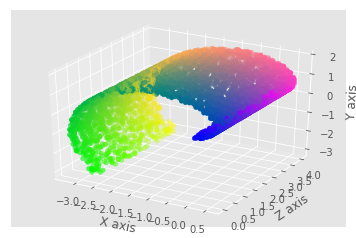

Epoch :99
  Loss 0.061467
Epoch :199
  Loss 0.038884
Epoch :299
  Loss 0.030645
Epoch :399
  Loss 0.024282
Epoch :499
  Loss 0.025746
Epoch :599
  Loss 0.024375
Epoch :699
  Loss 0.017080
Epoch :799
  Loss 0.006349
Epoch :899
  Loss 0.003422
Epoch :999
  Loss 0.002072
Epoch :1099
  Loss 0.001949
Epoch :1199
  Loss 0.002572
Epoch :1299
  Loss 0.001404
Epoch :1399
  Loss 0.002095
Epoch :1499
  Loss 0.001347
Epoch :1599
  Loss 0.001178
Epoch :1699
  Loss 0.001765
Epoch :1799
  Loss 0.000933
Epoch :1899
  Loss 0.000942
Epoch :1999
  Loss 0.000951
Embedded manifold


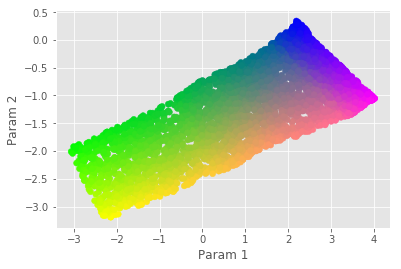

Reconstructed manifold


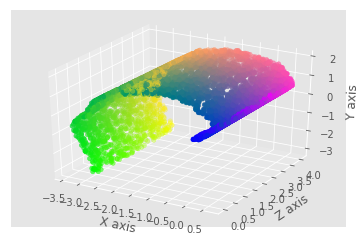

Reconstructed test manifold


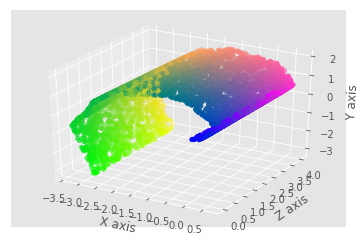

In [8]:
params, swissroll = generate_swissroll(n)
params_test, swissroll_test = generate_swissroll(n)
colors = color_from_parameters(params)
colors_test = color_from_parameters(params_test)
print("Original manifold")
plot_3d(swissroll, colors)
save_png("swissroll_original")
plt.show()

model = Autoencoder(swissroll, swissroll_test, nb_intermediate, learning_rate)

error, error_test = model.train(True, n_epochs, batch_size, colors=colors, test=swissroll_test, colors_test = colors_test)